In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from datetime import timedelta
import calendar 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('../DATA/Store.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info(memory_usage=True)
#(memory_usage=True) mettez par défaut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
#df.describe(include='all')

In [6]:
includes=['object','float','int']
df.describe(include=includes)

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


_________________________________ 

## Focus sur les catégories 

In [7]:
#df.loc[df.Category=='Furniture'].describe()
rslt = df[df['Category']=='Furniture']
rslt

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


In [8]:
rslt.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [10]:
rslt.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [11]:
df.Category=='Furniture'

0        True
1        True
2       False
3        True
4       False
5        True
6       False
7       False
8       False
9       False
10       True
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23       True
24       True
25      False
26      False
27       True
28      False
29       True
        ...  
9964     True
9965    False
9966    False
9967    False
9968    False
9969    False
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980     True
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989     True
9990     True
9991    False
9992    False
9993    False
Name: Category, Length: 9994, dtype: bool

In [12]:
rslt2 = df[df['Category']=='Technology']
rslt2.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000,1847.000000
mean,5003.331890,55551.572279,452.709276,3.756903,0.132323,78.752002
std,2900.259785,31896.118284,1108.655848,2.216828,0.141575,428.816633
min,8.000000,1841.000000,0.990000,1.000000,0.000000,-6599.978000
25%,2513.000000,23392.000000,68.016000,2.000000,0.000000,5.203650
50%,5054.000000,59601.000000,166.160000,3.000000,0.200000,25.018200
75%,7546.500000,90008.000000,448.534000,5.000000,0.200000,74.894600
max,9992.000000,99207.000000,22638.480000,14.000000,0.700000,8399.976000


In [13]:
#Afficher la date la plus ancienne pour la catégorie furniture 
# une series, on peut appliquer les méthodes numpy
#df.loc[df.Category=='Furniture']['Order Date'].min()
rslt['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [14]:
#Afficher la date la plus récente pour la catégorie furniture 
df.loc[df.Category=='Furniture']['Order Date'].max()
#rslt['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [15]:
#Compter le nombre de jours présent dans le dataset 
df.loc[df.Category=='Furniture']['Order Date'].map(lambda t:t.date()).unique()

array([datetime.date(2016, 11, 8), datetime.date(2015, 10, 11),
       datetime.date(2014, 6, 9), datetime.date(2017, 7, 16),
       datetime.date(2015, 9, 25), datetime.date(2015, 9, 17),
       datetime.date(2016, 12, 8), datetime.date(2015, 12, 27),
       datetime.date(2015, 4, 18), datetime.date(2016, 6, 17),
       datetime.date(2015, 11, 24), datetime.date(2015, 4, 30),
       datetime.date(2015, 4, 26), datetime.date(2017, 12, 9),
       datetime.date(2014, 11, 26), datetime.date(2017, 5, 28),
       datetime.date(2015, 1, 31), datetime.date(2017, 11, 9),
       datetime.date(2015, 11, 13), datetime.date(2017, 12, 25),
       datetime.date(2015, 3, 2), datetime.date(2016, 6, 12),
       datetime.date(2014, 12, 26), datetime.date(2014, 9, 20),
       datetime.date(2016, 11, 6), datetime.date(2016, 10, 13),
       datetime.date(2016, 9, 5), datetime.date(2014, 10, 22),
       datetime.date(2016, 12, 5), datetime.date(2014, 3, 1),
       datetime.date(2014, 9, 8), datetime.date(20

In [16]:
df.loc[df.Category=='Furniture']['Order Date'].max() - df.loc[df.Category=='Furniture']['Order Date'].min()
#nbre de jour répétitif

Timedelta('1454 days 00:00:00')

In [17]:
len(df.loc[df.Category=='Furniture']['Order Date'].map(lambda t:t.date()).unique())
#il y a des jours qu'ils ont pas vendu des furnitures

889

In [118]:
import numpy as np

a = [4,6,12]

np.cumsum(a)

array([ 4, 10, 22])

In [18]:
df.loc[df.Category=='Furniture']['Order Date'].nunique()

889

In [19]:
df.loc[df.Category=='Furniture']['Order Date'].unique()

array(['2016-11-08T00:00:00.000000000', '2015-10-11T00:00:00.000000000',
       '2014-06-09T00:00:00.000000000', '2017-07-16T00:00:00.000000000',
       '2015-09-25T00:00:00.000000000', '2015-09-17T00:00:00.000000000',
       '2016-12-08T00:00:00.000000000', '2015-12-27T00:00:00.000000000',
       '2015-04-18T00:00:00.000000000', '2016-06-17T00:00:00.000000000',
       '2015-11-24T00:00:00.000000000', '2015-04-30T00:00:00.000000000',
       '2015-04-26T00:00:00.000000000', '2017-12-09T00:00:00.000000000',
       '2014-11-26T00:00:00.000000000', '2017-05-28T00:00:00.000000000',
       '2015-01-31T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2015-11-13T00:00:00.000000000', '2017-12-25T00:00:00.000000000',
       '2015-03-02T00:00:00.000000000', '2016-06-12T00:00:00.000000000',
       '2014-12-26T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
       '2016-11-06T00:00:00.000000000', '2016-10-13T00:00:00.000000000',
       '2016-09-05T00:00:00.000000000', '2014-10-22

In [20]:
#Vérifier que c'est pareil pour la catégorie Technology 

df.loc[df.Category=='Technology']['Order Date'].max() - df.loc[df.Category=='Technology']['Order Date'].min()

Timedelta('1454 days 00:00:00')

_________________________________ 

## Mini data preprocessing 

In [21]:
#Construire un dataframe uniquement composé de la date et de la catégorie furniture
dfur=rslt[['Order Date','Sales']]
dfur.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [22]:
#Or
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
rslt.drop(cols, axis=1,inplace=True)

#ca peut marcher mais quand je mais inplace, il affiche pas les results?

In [23]:
dfur.columns.tolist()

['Order Date', 'Sales']

In [34]:
#Trier votre nouveau dataset par date croissante 
dfur=dfur.sort_values('Order Date')
dfur.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [25]:
#Vérifier que le dataset ne possède pas d'éléments nuls 
dfur.isna().sum(axis=0)
#dfur.isna().any()
#rslt.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [26]:
#Réindexer votre dataset pour que les indices "suivent les dates"
#C-a-d que l'indice n°1 soit la première date, l'indice n°2 la deuxième ... 
dfur=dfur.groupby('Order Date')['Sales'].sum().reset_index()
dfur.head()
#groupby('order Date'): ne met pas des valeurs répetitifs

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [27]:
dfur.set_index('Order Date').head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [28]:
#Maintenant mettre les date comme indice / meta colonne
dfur.set_index('Order Date',drop=True,inplace=True)
dfur.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


**Il est parfois difficile de travailler avec des données datetime. Nous utiliserons plutôt les valeurs des ventes quotidiennes moyennes pour un mois et le début de chaque mois comme horodatage.**

In [48]:
#Afficher les ventes moyenne pour chaque mois 
#L'exemple ci-dessous ne montre que les 5premiers mois 
#Vous devez le faire pour le dataset en entier 
y = dfur['Sales'].resample('MS').mean() # M:mois, S: tu mets en plus, ex)1er jour du mois
y.head()

Order Date
2014-01-01    480.194231
2014-02-01    367.931600
2014-03-01    857.291529
2014-04-01    567.488357
2014-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

In [53]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [49]:
#dfur['Sales'].resample('M').mean().head()

Order Date
2014-01-31    480.194231
2014-02-28    367.931600
2014-03-31    857.291529
2014-04-30    567.488357
2014-05-31    432.049188
Freq: M, Name: Sales, dtype: float64

In [50]:
#Regarder le chiffre moyen par mois sur l'année 2017
dfur[dfur.index.year==2017].resample('MS').mean()  
#dfur['Sales'].resample('MS').mean()['2017']

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583


In [52]:
#Donner le chiffre d'affaire moyen par mois de l'année 2017 
print(f"le chiffre moyen de l'année 2017 est de {dfur.resample('MS').mean()['2017'].mean().round(2)[0]}€")

le chiffre moyen de l'année 2017 est de 788.99€


___________________________________
## Visualisation 
### Variables catégoriques 

In [56]:
#Ploter les variables catégoriques 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

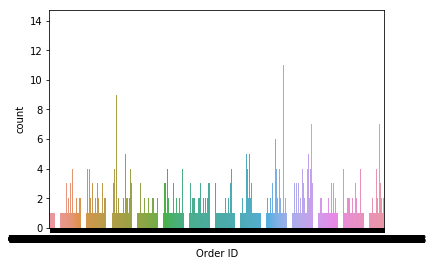

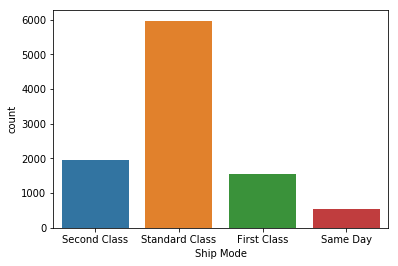

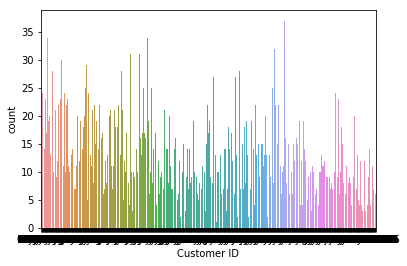

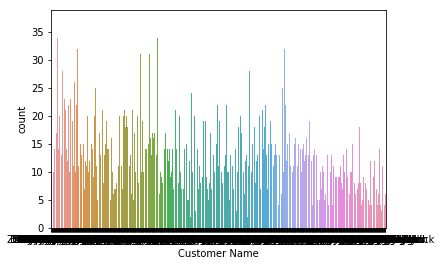

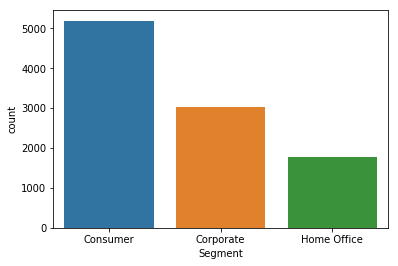

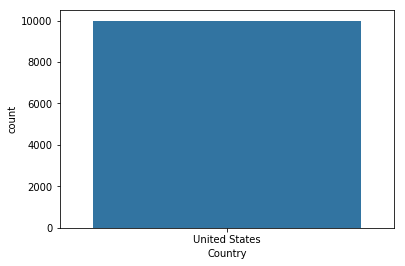

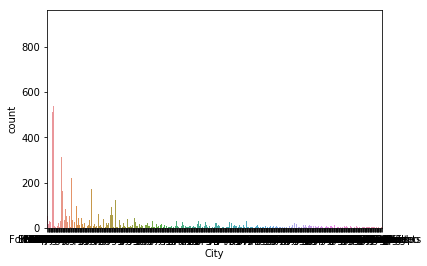

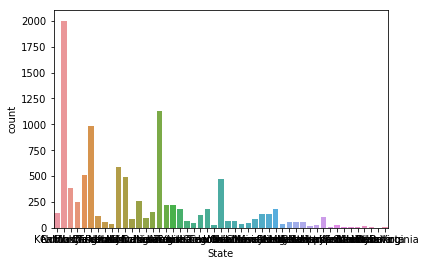

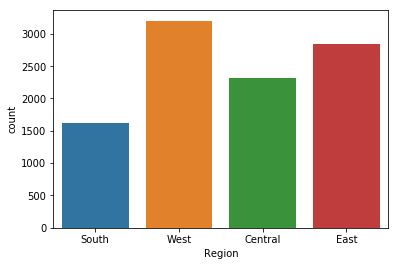

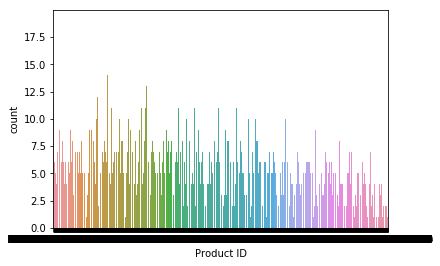

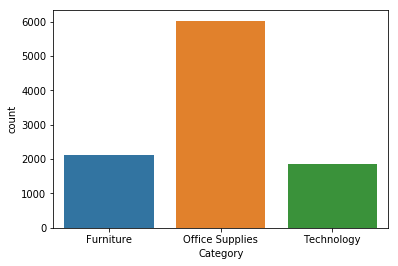

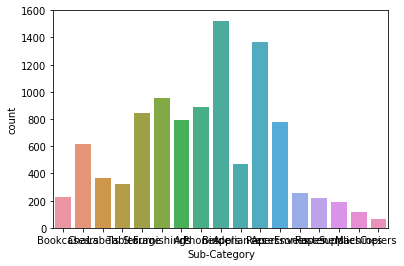

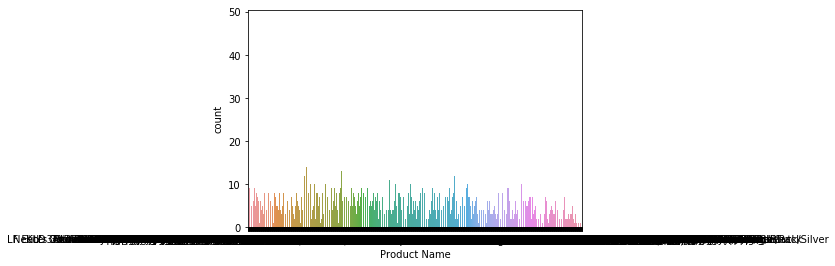

In [57]:
for c in df.columns.tolist():
    if df[c].dtype == 'object':
        sns.countplot(c,data=df)
        plt.show()

In [ ]:
sns.set(style="white") 
for i,elt in enumerate(df.columns): 
    if df.dtypes[i]=='object':         
        fig = plt.figure(figsize=(23,10))         
        ax = sns.countplot(x=elt, data=df)     
        plt.show()

In [ ]:
# A tester
sns.set(style="white")
for i,elt in enumerate(df.columns):
    if df.dtypes[i]=='object':
        ax = sns.countplot(x=elt, data=df)
        plt.show()
fig = plt.figure(figsize=(23,10))

### Dates 

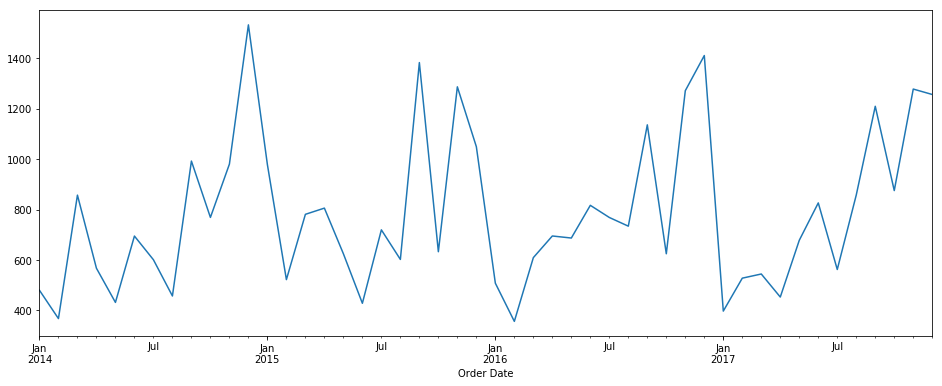

In [58]:
#Afficher les ventes moyenne pour chaque mois
#Que remarquez vous ? 
y = dfur['Sales'].resample('MS').mean()
y.plot(figsize=(16,6))
plt.show()

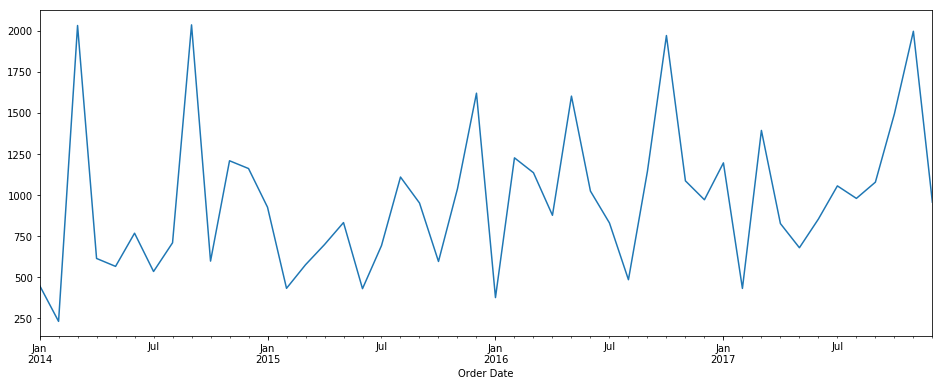

In [67]:
rslt2.drop(cols, axis=1, inplace=True)
rslt2.sort_values('Order Date')
rslt2 = rslt2.groupby('Order Date')['Sales'].sum().reset_index()
rslt2 = rslt2.set_index('Order Date')
yy=rslt2['Sales'].resample('MS').mean()
yy.plot(figsize=(16, 6))
plt.show()

In [81]:
from pylab import rcParams
import statsmodels.api as sm

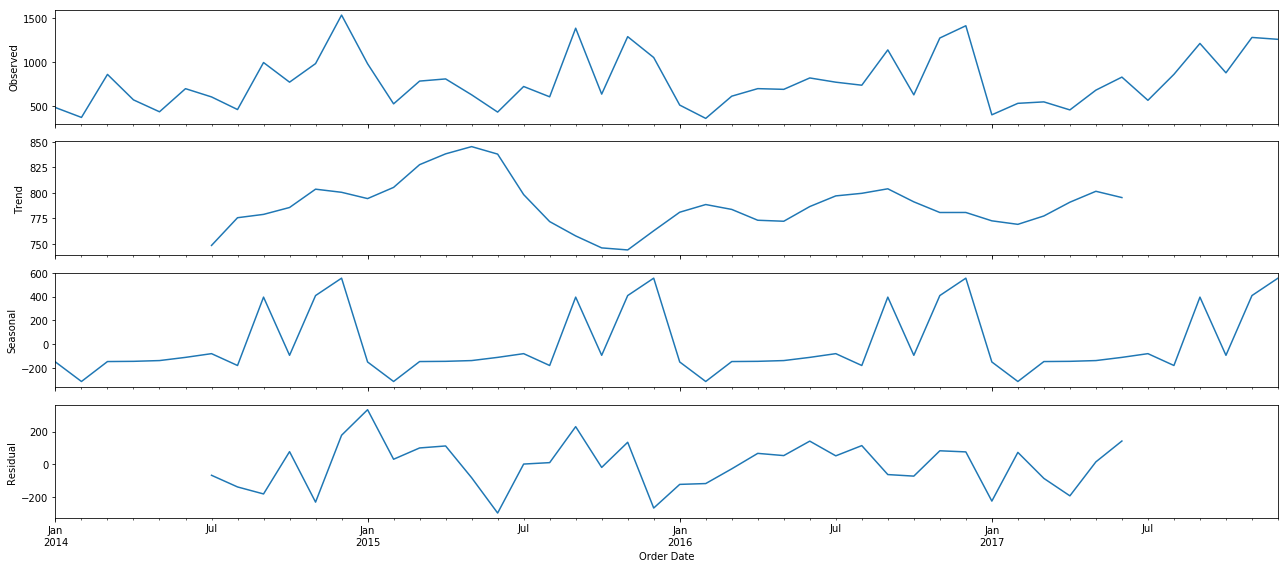

In [83]:
#Décomposer grace à la librairie statmodels votre série en 3 sous serie 
#Trouver la fonction qui vous permet d'extraire de votre série 
#la tendance, les saisonnalités et le bruit 

rcParams['figure.figsize']=18,8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig= decomposition.plot()
plt.show()

In [84]:
#Faire la décomposition pour la catégorie trechnology 
#Cela confirme bien ce que vous pensiez ? 
from pylab import rcParams
import statsmodels.api as sm

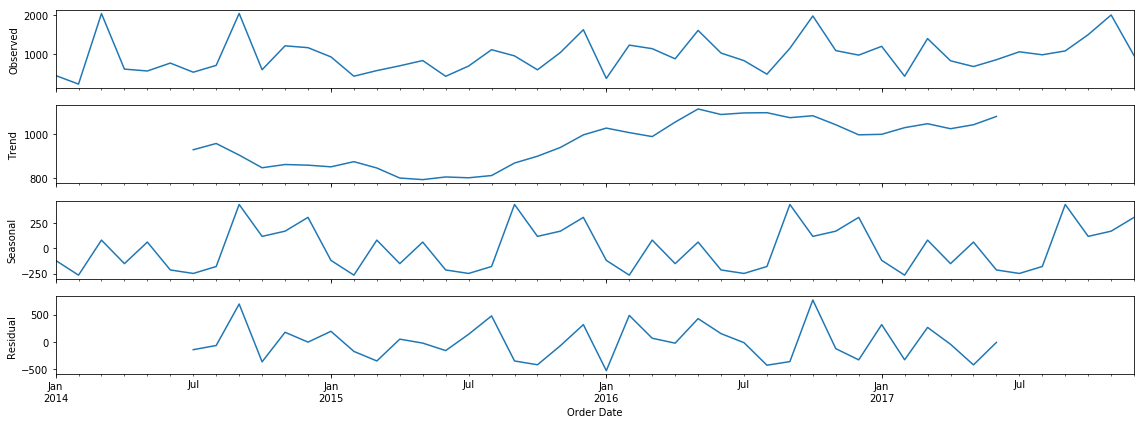

In [86]:
rcParams['figure.figsize']=16,6

decomposition = sm.tsa.seasonal_decompose(yy, model='additive')
fig=decomposition.plot()
plt.show()